如果数据展现的是一个曲线，那么相对于非线性回归来说，线性回归不会有很高的准确率。这一篇使用1960年至2014年GDP数据来做一个非线性回归模型

__import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

下载数据：

In [3]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")

In [4]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


画一个图看一下数据：

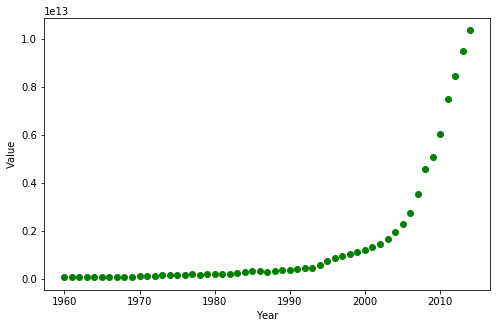

In [7]:
plt.figure(figsize=(8,5))
x_data,y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'go')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

可以看出来散点图呈现非线性的趋势，用线性表达式已经无法很好的拟合，所以下面考虑一些非线性的模型

考虑下面这个公式：
$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$
对应的图形如下：

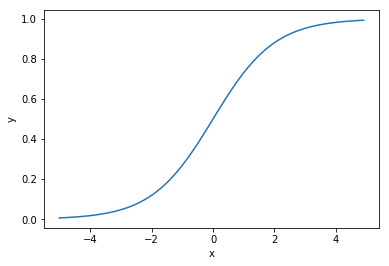

In [8]:
x=np.arange(-5.0,5.0,0.1)
y=1.0/(1.0+np.exp(-x))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

由此图猜想，如果适当改变beta_1、beta_2参数的话，有可能会拟合的很好。

首先创建模型：

In [9]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

一个例子：

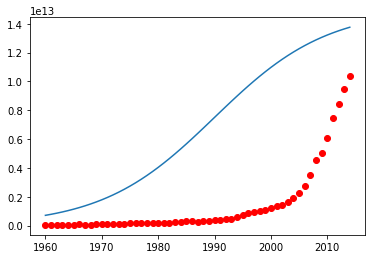

In [18]:
pre_y=sigmoid(x_data,0.1,1990.0)
plt.plot(x_data,y_data,'ro')
plt.plot(x_data,pre_y*15000000000000)
plt.show()

In [19]:
#标准化数据
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

使用非线性最小二乘法来拟合函数sigmoid，找到参数beta_1、beta_2使得sigmoid(xdata, *popt)-ydata的残差平方和最小

In [22]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,xdata,ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


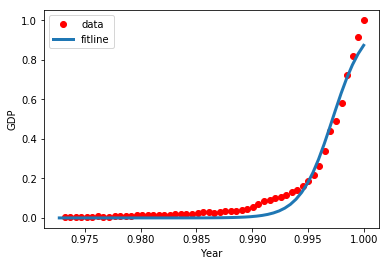

In [23]:
x=np.linspace(1960, 2015, 55)
x=x/max(x)
fit_y=sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data') #原始数据经过标准化后的数据
plt.plot(x,fit_y,linewidth=3.0,label='fitline') #拟合后的曲线
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

由上图就可以看出来拟合的还是不错的，下面就来计算一下模型的准确率

1、首先把数据分为train和test数据集

In [24]:
msk=np.random.rand(len(df))<0.8
train_x=xdata[msk]
test_x=xdata[~msk]
train_y=ydata[msk]
test_y=ydata[~msk]

2、然后用训练集数据训练模型

In [25]:
popt,pcov=curve_fit(sigmoid,train_x,train_y)

3、得到模型的参数后，计算测试集的预测值

In [27]:
pre_y=sigmoid(test_x,*popt)

4、计算训练模型的准确率

In [29]:
#平均绝对误差
print('mean absolute error: %.2f'% np.mean(np.absolute(pre_y-test_y)))
#均方误差
print('mean squared error:%.2f'% np.mean((pre_y-test_y)**2))
#r方
from sklearn.metrics import r2_score
print('r2_score:%.2f'% r2_score(pre_y,test_y))

mean absolute error: 0.04
mean squared error:0.00
r2_score:0.93


r方达到了0.93，说明模型拟合的非常好。